In [109]:
# Import pustaka dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Import pustaka machine learning
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [113]:
# Muat dataset Breast Cancer Wisconsin
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [115]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [9]:
# Lihat informasi umum
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# Hitung statistik deskriptif
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [13]:
# Distribusi target (benign vs malignant)
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


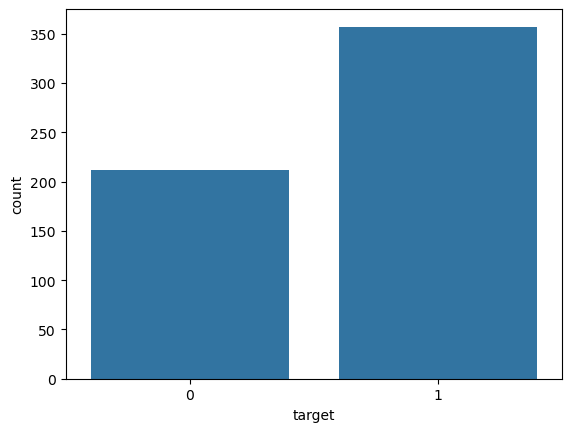

In [15]:
# Visualisasi distribusi diagnosis (benign=0, malignant=1)
sns.countplot(x='target', data=df)
plt.show()

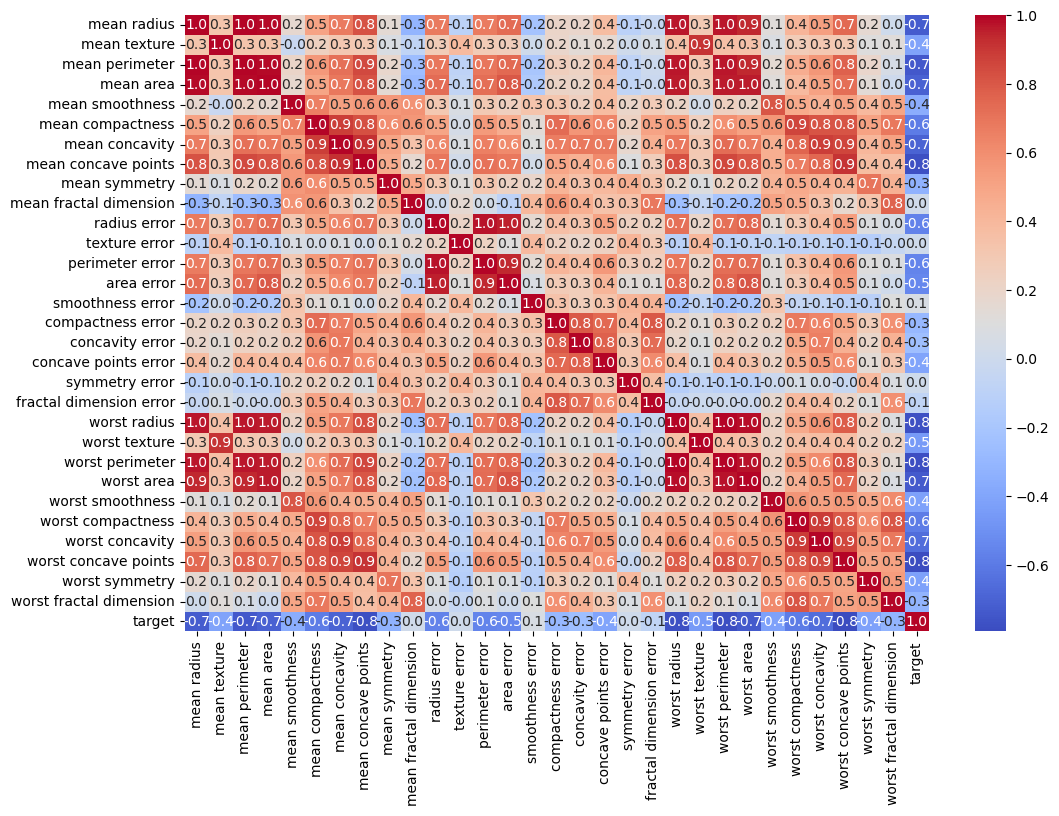

In [107]:
# Korelasi antara fitur
corr_matrix = df.corr()
# Visualisasi korelasi dalam bentuk heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [19]:
# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

In [21]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Inisialisasi model Logistic Regression
model = LogisticRegression()

# Latih model
model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

Accuracy: 0.97


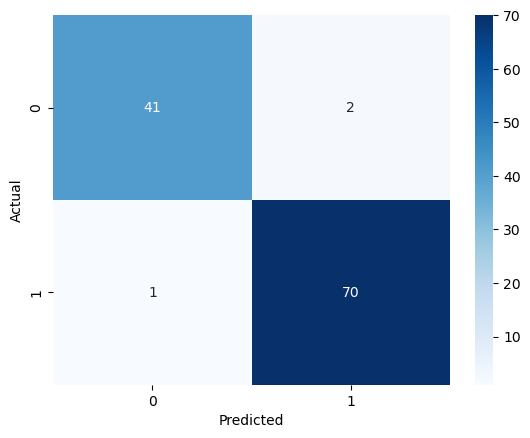

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [27]:
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriks confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Laporan klasifikasi
print(classification_report(y_test, y_pred))

In [47]:
# MODEL RANDOM FOREST
# Tambah Library RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

In [49]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred = model.predict(X_test)

Akurasi:  0.96%


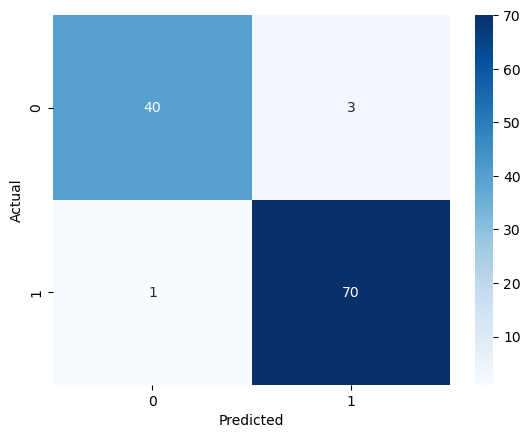


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [51]:
# Mengukur akurasi 
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy : .2f}%")

# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [53]:
# Setup K-Fold cross-validation dengan 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [55]:
# Melakukan cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [63]:
# Evaluasi performa menggunakan cross-validation score
cv_scores = cross_val_score(model, X, y, cv=kf)

# Tampilkan hasil evaluasi
print(f"Akurasi rata-rata dari K-Fold Cross-Validation: {np.mean(cv_scores):.2f}%")

Akurasi rata-rata dari K-Fold Cross-Validation: 0.96%


In [71]:
# MODEL SVM 
# Library SVM 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

In [73]:
# Inisialisasi model SVM
model = SVC(kernel='linear', random_state=42)
# Latih model SVM
model.fit(X_train, y_train)
# Prediksi dengan data uji
y_pred = model.predict(X_test)

Akurasi:  0.93%


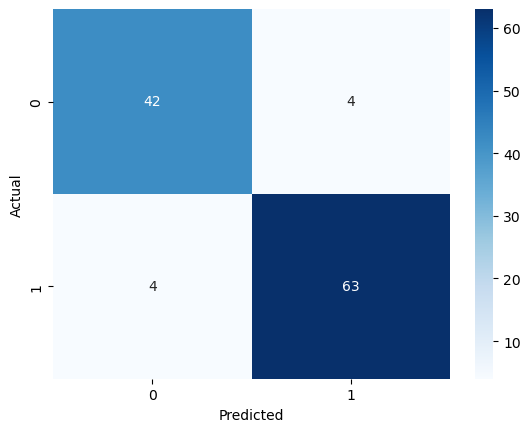


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        46
           1       0.94      0.94      0.94        67

    accuracy                           0.93       113
   macro avg       0.93      0.93      0.93       113
weighted avg       0.93      0.93      0.93       113



In [77]:
# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy : .2f}%")
    
# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [79]:
# K-Fold Cross-Validation dengan 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Looping K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [83]:
# Evaluasi performa menggunakan cross-validation score (akurasi)
cv_scores = cross_val_score(model, X, y, cv=kf)

# Tampilkan hasil evaluasi
print(f"Akurasi rata-rata dari K-Fold Cross-Validation dengan SVM: {np.mean(cv_scores):.2f}%")

Akurasi rata-rata dari K-Fold Cross-Validation dengan SVM: 0.95%


In [105]:
#Hasil Akurasi
print("Hasil Akurasi Semua Model:")
print("LR : 0.97% , RF : 0.96% , SVM : 0.93%")

Hasil Akurasi Semua Model:
LR : 0.97% , RF : 0.96% , SVM : 0.93%
